Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0017 - val_loss: 9.6125e-05
Epoch 2/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4321e-04 - val_loss: 9.9976e-05
Epoch 3/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.7276e-05 - val_loss: 7.7625e-05
Epoch 4/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5330e-04 - val_loss: 7.4016e-05
Epoch 5/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.7495e-05 - val_loss: 7.3802e-05
Epoch 6/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4636e-05 - val_loss: 6.9911e-05
Epoch 7/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0226e-04 - val_loss: 8.1408e-05
Epoch 8/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.6648e-05 - val_loss: 7.8517e-05
Epoch 9/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2097e-04 - val_loss: 6.9755e-05
Epoch 10/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.3630e-05 - val_loss: 7.2893e-05
Epoch 11/50
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

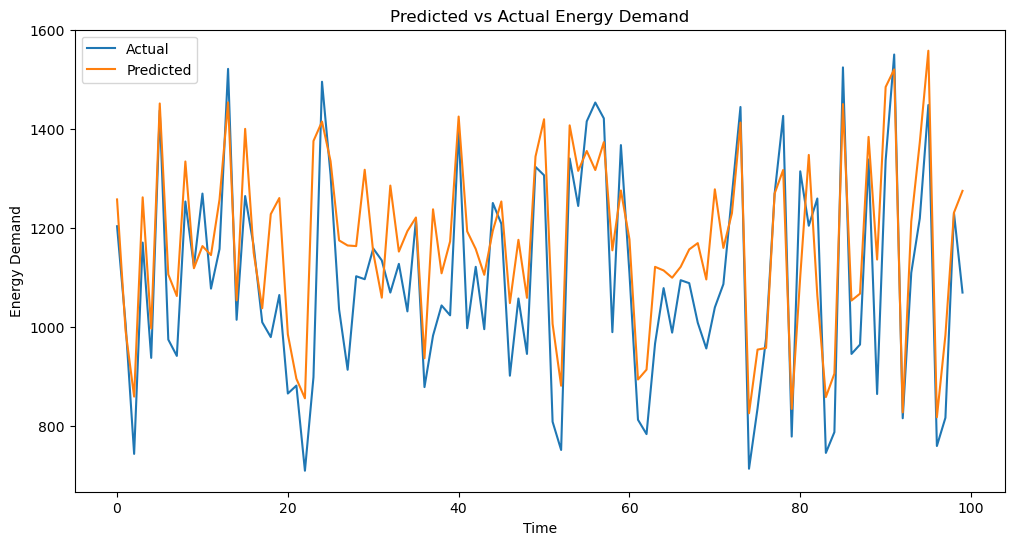

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

file_path = '/Users/sanjeevsubramanian/Downloads/EnergyModel.xlsx' #Replace this with path to file on your computer
df = pd.read_excel(file_path)

df['EnergyDemand'].fillna(df['EnergyDemand'].mean(), inplace=True)

temperature = df['Temperature'].values.reshape(-1, 1)
energy_demand = df['EnergyDemand'].values.reshape(-1, 1)

scaler_temp = MinMaxScaler()
scaler_energy = MinMaxScaler()
temperature_normalized = scaler_temp.fit_transform(temperature)
energy_demand_normalized = scaler_energy.fit_transform(energy_demand)

def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 24
X, y = create_sequences(temperature_normalized, seq_length)
y = energy_demand_normalized[seq_length:]

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

predictions_normalized = model.predict(X_test)

predictions = scaler_energy.inverse_transform(predictions_normalized)

y_test_original = scaler_energy.inverse_transform(y_test)
mse = mean_squared_error(y_test_original, predictions)
mae = mean_absolute_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(scaler_energy.inverse_transform(y_test[:100]), label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Predicted vs Actual Energy Demand')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()